In [29]:
import ques_four_main as main
import matplotlib.pyplot as plt

import random
from deap import algorithms, base, creator, tools


# 定义多目标优化问题
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0,-1.0))  # 定义多目标优化的权重
creator.create("Individual", list, fitness=creator.FitnessMin)  # 定义个体类型

# 初始化种群和个体
toolbox = base.Toolbox()

# 定义自变量 x 的属性生成函数和取值范围
toolbox.register("attr_float_x", random.uniform, 20, 70)
# 定义自变量 y 的属性生成函数和取值范围
toolbox.register("attr_float_y", random.uniform, 100,250)
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (toolbox.attr_float_x, toolbox.attr_float_y), n=1)  # 定义个体的基因数量
N=1000000
toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # 定义种群
# 定义评估函数
def evaluate(individual):
    x, y = individual
    res=main.get_all_res(x,y)
    return res[2], res[3]*N,res[4]

toolbox.register("evaluate", evaluate)  # 注册评估函数

# 定义交叉和变异操作
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
toolbox.register("select", tools.selNSGA2)  # 使用NSGA-II选择算法

# 设置算法参数
population_size = 15 # 种群大小
max_generations = 10  # 最大迭代次数
crossover_probability = 0.3  # 交叉概率
mutation_probability = 0.5  # 变异概率


# 创建种群
population = toolbox.population(n=population_size)

# 创建种群
population = toolbox.population(n=population_size)
best_fitness_values = []
# 运行多目标优化算法
for generation in range(max_generations):
    # 输出当前代数以及最优个体的适应度值

    # 运行一个迭代的算法步骤
    algorithms.eaSimple(population, toolbox, cxpb=crossover_probability, mutpb=mutation_probability,
                        ngen=1, verbose=False)
    best_individuals = tools.selBest(population, k=1)
    
    best_objectives = [individual.fitness.values for individual in best_individuals]
    best_fitness_values.append(best_objectives[0])
    print("Generation:", generation + 1)
    print("Best objectives:", best_objectives)
    print("Best parameters:",  best_individuals)
# 输出最优解
best_individuals = tools.selBest(population, k=1)
best_objectives = [individual.fitness.values for individual in best_individuals]
print("Best objectives:", best_objectives)
print("Best parameters:",  best_individuals)
print(best_fitness_values)


c:\Users\19234\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\19234\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


44.674995073977556 181.46337870132064
378017.5776065378 0.13655040464913365 0.5301542776998598
44.85471801216248 129.89920179937212
528056.0221457323 0.06484742209030138 0.6989032901296112
57.55402958556837 351.31654160352673
195200.91787693452 0.439291554095154 0.0
36.951542987345505 166.12156986959536
412877.3700142238 0.11541426070510508 0.5919540229885057
48.33607025585919 351.78432120476464
195000.09541046966 0.44209798185712285 0.0
51.99861892341472 139.70672756464472
490972.08804691146 0.07903536273141139 0.6923791821561338
38.235217796814894 331.41082765275985
206876.8236429712 0.40882359481762803 0.0
42.80633951666942 108.52528753663577
632089.1946457061 0.03970910813546473 0.768303186907838
42.842685429224915 303.1478372657947
226274.4408400201 0.3526309546998366 0.0
32.897084621156225 246.4044949498057
278342.12897954334 0.24219565729393405 0.14798206278026907
62.502170023792154 427.58451750073425
160431.06552002995 0.5457148757386517 0.0
45.49715218404114 376.7369804972483


c:\Users\19234\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


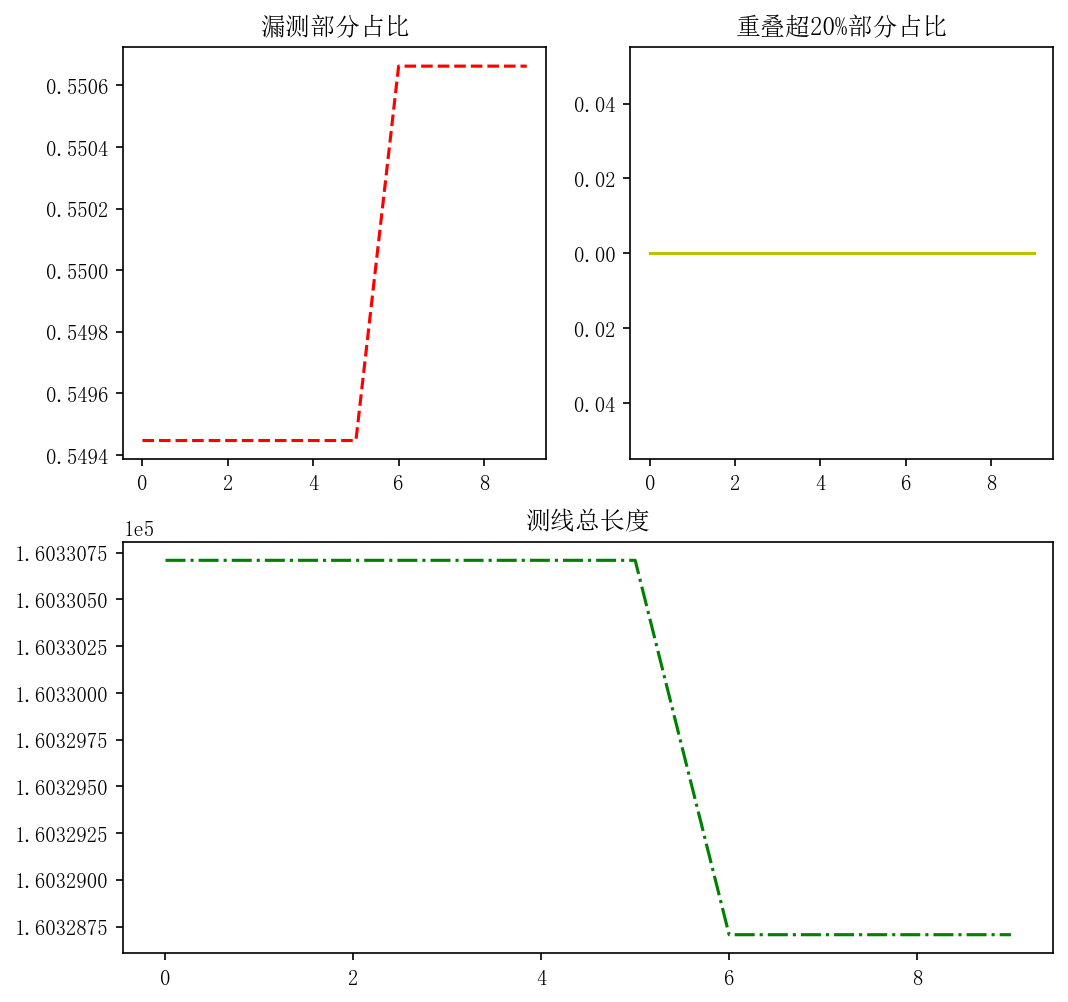

In [30]:
import numpy as np
plt.rc("font",family='SimSun')
best_fitness_values=np.array(best_fitness_values)
plt.figure(figsize=(8,8), dpi=150)
plt.figure(1)

ax1 = plt.subplot(221)
ax1.set_title("漏测部分占比")
plt.plot(best_fitness_values[:,1]/N, color="r",linestyle = "--")
ax2 = plt.subplot(222)
ax2.set_title("重叠超20%部分占比")
plt.plot(best_fitness_values[:,2],color="y",linestyle = "-")
ax3 = plt.subplot(212)
ax3.set_title("测线总长度")
plt.plot(best_fitness_values[:,0],color="g",linestyle = "-.")
# ax3.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
plt.ticklabel_format(style='sci',scilimits=(0,0),axis='both',useOffset=False)
# plt.xlabel('Generation')
# plt.ylabel('Fitness')

# plt.legend()

plt.show()

In [28]:
best_fitness_values

array([[5.82735046e+05, 3.13289994e-01, 2.39361702e-02],
       [5.82735046e+05, 3.13289994e-01, 2.39361702e-02],
       [5.82735046e+05, 3.13289994e-01, 2.39361702e-02],
       [5.69033255e+05, 3.10718861e-01, 1.28534704e-02],
       [5.82735046e+05, 3.13289994e-01, 2.39361702e-02],
       [5.82735046e+05, 3.13289994e-01, 2.39361702e-02],
       [5.82735046e+05, 3.13289994e-01, 2.39361702e-02],
       [5.82735046e+05, 3.13289994e-01, 2.39361702e-02],
       [5.82735046e+05, 3.13289994e-01, 2.39361702e-02],
       [5.82735046e+05, 3.13289994e-01, 2.39361702e-02]])